<a href="https://colab.research.google.com/github/tcdixon4/the-riddler/blob/master/20220605_oasis_escape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oasis escape


---





## The problem

Imagine that you have found yourself at an oasis in the middle of an endless desert acompanied by a crew of fellow wanderers. To keep cool, you and the others wade in the long and narrow pool at the center of the oasis.

One day, you all decide to leave. The comforts of the oasis cannot overcome its dreadful monotony. You each independently pick a random location in the pool to take off from (which is narrow enough to be considered a line), and depart along a random direction. 

**What is the probability that no one departing the oasis ever touches the same grain of sand as another again? In other words, what is the probability that no two paths intersect, as a function of the total number of people `N`?**


See [The Riddler blog post](https://fivethirtyeight.com/features/can-you-escape-the-desert/) on FiveThirtyEight for the full setup (which I have taken some creative freedoms in describing here).

## Digesting the problem

Let's figure out a good way to attack this problem. What would a successful scenario look like? What would an unsuccessful scenario look like? These are always good things to figure out at the onset of a probability theory problem. We will need to make two key observations for the solution presented here.

&nbsp;  

**1. Our first observation should be that order matters!**

Considering only departures going north of our pool, we can see that the order of the individuals along the linear pool is what really matters. As long as everyone is ordered according to their departure angle, no two paths will intersect. We don't need to concern ourselves with any more specifics about the departures. Below are the same two departure trajectories, but ordered differently along the pool. If in the correct order (first image), the paths will never intersect. But in the incorrect order (second image), they will.

<img src="https://github.com/tcdixon4/the-riddler/blob/master/images/20220605_oasis_escape-01.png?raw=true" height="200"/>
</div>
<img src="https://github.com/tcdixon4/the-riddler/blob/master/images/20220605_oasis_escape-02.png?raw=true" height="200"/>
</div>

&nbsp; 

By extension, we can see that any number of people all departing to the north will have non-intersecting paths if-and-only-if they are ordered according to their departure angle, as with the rainbow paths below **(happy Pride!)**.

<img src="https://github.com/tcdixon4/the-riddler/blob/master/images/20220605_oasis_escape-03.png?raw=true" height="200"/>
</div>

&nbsp; 

**2. Our second observation should be that departures to the north and south are independent of one another!**

Now let's consider the fact that some people will leave to the south. All of these people will be guaranteed to never cross the path of anyone going north because the earth is flat (/s). That means that a successful arrangement only requires that everyone going north is internally ordered correctly, and everyone going south is internally ordered correctly. As seen below, you could shift the north-goers and south-goers side-to-side along the pool and everyone will still be happy.

<img src="https://github.com/tcdixon4/the-riddler/blob/master/images/20220605_oasis_escape-04.png?raw=true" height="200"/>
</div>



## Formalizing the problem
We will be concerned with two probability components in our solution:
1. Out of all the people involved in the exodus, `N`, what is the probability that a certain subset of people, `k`, is heading north (and the rest, `N-k`, are heading south)?
2. Given a certain `k`, what is the probability that all `k` north-goers are correctly ordered, AND all `N-k` south-goers are correctly ordered?



## Solving the problem


### 1. How many people are going north and south?

The first part involves the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution), which can tell us the probability that `k` successes occur in repeated independent samples of an event that happens with probability `p_s`. We can consider each person's departure to be an independent sample, with "success" meaning that they went north. The probability mass function for the binomial distribution is:

<p align="center">
$ p(k|p_s,N) = \frac{N!}{k!(N-k)!} p_{s}^k (1-p_{s})^{N-k}$
<p>

Here, `p=1/2` because it is equally likely that each person will go north or south under the assumption that directions are chosen uniformly at random. That simplifies things a bit:

<p align="center">
$ p(k|N) = \frac{N!}{k!(N-k)!}(\frac{1}{2})^N$
<p>

&nbsp; 

### 2. What's the probability that `k` (and `N-k`) people leave in order of their departure angles?

The second part can be arrived at through combinatorics. We will assume that it is impossible to have EXACTLY the same departure angle or departure location. Let's also assume that everyone has first decided their departure angle to make things more intuitive. There is therefore ONE SINGLE ordering of individuals along the pool that will put them in order according to those departure angles. Our probability that the north-goers have taken that order is then one out of the total number of possible order permutations, or:

<p align="center">
$ p(\text{north ordered}|k) = \frac{1}{k!}$
<p>

Similarly, the probability for the south-goers is:

<p align="center">
$ p(\text{south ordered}|k,N) = \frac{1}{(N-k)!}$
<p>

Since these are independent, the joint probability is simply the product:

<p align="center">
$ p(\text{ordered}|k,N) = \frac{1}{k!(N-k)!}$
<p>

&nbsp; 

### 3. How can we put these probabilities together?

Finally, all we need to do is sum the probabilities that all orderings are correct given each possible division of people going to the north or south. This follows:

<p align="center">
$ p(\text{no intersect}|N) = ∑_{k=0}^N p(k|N) \cdot p(\text{ordered}|k,N)$
<p>

With some substitution and a little bit of rearranging, we can arrive at:

<p align="center">
$ p(\text{no intersect}|N) = ∑_{k=0}^N \frac{N!}{k!(N-k)!}(\frac{1}{2})^N \cdot \frac{1}{k!(N-k)!}$
<p>

<p align="center">
$ \hspace{37pt} = ∑_{k=0}^N \frac{N!}{k!^2(N-k)!^2 2^N}$
<p>

&nbsp; 


---



---


Cool! There might be a way to reduce this further, but it's good enough to code up and take a look at - so let's do it!










In [ ]:
#@title
import numpy as np
from math import factorial
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import animation, rc, cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from IPython.display import HTML

In [ ]:
#@title
def p_intersect(N):
    p = 0
    for k in range(N+1):
        p_k = factorial(N) / (factorial(k) * factorial(N-k) * 2**N)
        p_north_ordered = 1 / factorial(k)
        p_south_ordered = 1 / factorial(N-k)
        p += p_k * p_north_ordered * p_south_ordered

    return p

### Taking a look at the answer

We've written a function above to compute the intersection probability given `N` people fleeing the oasis. Let's evaluate this for some values of `N` and see how that probability changes. Our intuition should tell us that it becomes harder and harder to not cross paths if we add more people, since one person is guaranteed to not cross another's path, and infinitely many people would cover the entire landscape.

In [ ]:
#@title
p = np.zeros(11)
for N in range(11):
    p[N] = p_intersect(N)

[]

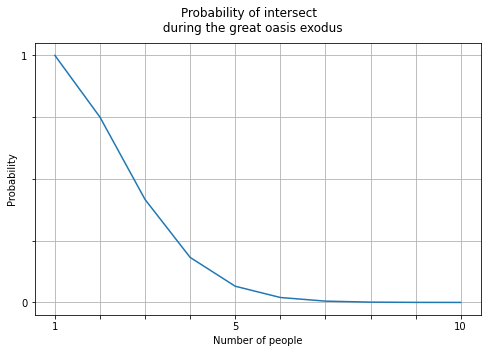

In [ ]:
#@title
fig, ax = plt.subplots(1, 1, figsize =(8, 5))
fig.patch.set_facecolor('white')

fig.suptitle('Probability of intersect \n during the great oasis exodus')

ax.plot(np.arange(1,11), p[1:])
ax.set_xticks(np.arange(1,11))
ax.set_xticklabels([1] + ['']*3 + [5] + ['']*4 + [10])
ax.set_xlabel('Number of people')
ax.set_ylim([-0.05, 1.05])
ax.set_yticks(np.arange(0,1.1,0.25))
ax.set_yticklabels([0] + ['']*3 + [1])
ax.set_ylabel('Probability')
ax.grid()

plt.plot()

That probability drops pretty quickly! If you're sick of the people you've spent all that time at the oasis with and never want to tread the same sand as them ever again, you better hope there weren't many of them.